In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelBinarizer, StandardScaler

# Analyse des données

In [4]:
open('FichierMock_réduit.csv','r').readlines()[:5]

['id_vente;date_vente;id_client;categorie_client;id_magasin;prix_vente_unitaire;quantité;id_produit;categorie_produit\n',
 '1;02/01/2015;83734;Culturel;108;46.98;2;81910;Culturel\n',
 '1;02/01/2015;83734;Culturel;108;45.6;6;61616;Mode\n',
 '1;02/01/2015;83734;Culturel;108;9.2;3;86616;Culturel\n',
 '1;02/01/2015;83734;Culturel;108;43.42;4;84213;Culturel\n']

In [57]:
dtypes = {"id_vente": int, "date_vente": object, "id_client": int, "categorie_client": object, "id_magasin": int, "prix_vente_unitaire": float, "quantité": int, "id_produit": int, "categorie_produit": object}
parse_dates = ["date_vente"]
ventes2015sousensemble = pd.read_csv('FichierMock_réduit.csv', sep=';', header=None, skiprows=1, dtype=dtypes, names = ['Vente', 'Date', 'Client', 'Profil', 'Magasin', 'Prix', 'Quantité', 'Produit', 'Catégorie_de_produit'], date_parser = parse_dates, encoding="ISO-8859-1")

In [58]:
features = pd.DataFrame(ventes2015sousensemble)

In [59]:
features.head()

,Vente,Date,Client,Profil,Magasin,Prix,Quantité,Produit,Catégorie_de_produit
0,1,02/01/2015,83734,Culturel,108,46.98,2,81910,Culturel
1,1,02/01/2015,83734,Culturel,108,45.60,6,61616,Mode
2,1,02/01/2015,83734,Culturel,108,9.20,3,86616,Culturel
3,1,02/01/2015,83734,Culturel,108,43.42,4,84213,Culturel
4,1,02/01/2015,83734,Culturel,108,21.26,2,81314,Culturel


In [60]:
#Statistiques descriptives sur les données numériques prix et quantité :
features[['Prix', 'Quantité']].describe()

,Prix,Quantité
count,1006.000000,1006.000000
mean,25.001859,5.636183
std,14.193342,2.841561
min,0.710000,1.000000
25%,12.762500,3.000000
50%,25.710000,6.000000
75%,37.137500,8.000000
max,49.960000,10.000000


In [61]:
#Statistiques descriptives sur les données textuelles Profil et Catégorie de produit  :
features[['Profil', 'Catégorie_de_produit']].describe()

,Profil,Catégorie_de_produit
count,1006,1006
unique,10,11
top,High-tech,High-tech
freq,184,176


In [62]:
#Statistiques descriptives sur la date :
features['Date'].describe()

count           1006
unique             1
top       02/01/2015
freq            1006
Name: Date, dtype: object

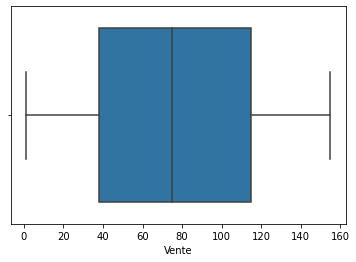

In [69]:
sns.boxplot(x = features['Vente'])
#Pas de données aberrantes !

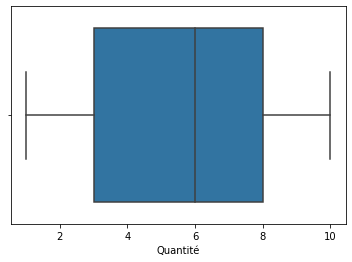

In [71]:
sns.boxplot(x = features['Quantité'])
#Idem

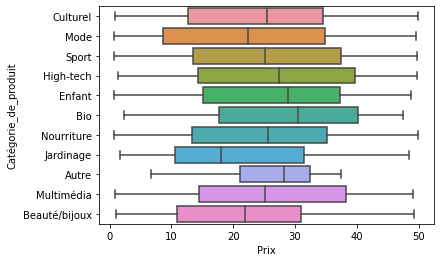

In [67]:
#Quelle catégorie de produit a des prix plus conséquents ?
sns.boxplot(x = 'Prix', y = 'Catégorie_de_produit', data = features)

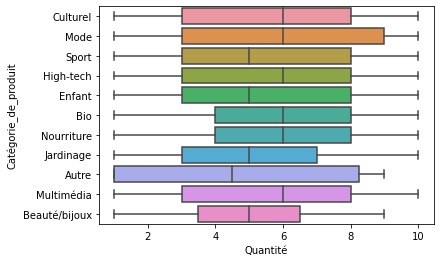

In [68]:
#Quelle catégorie de produit est achetée en plus grande quantité ?
sns.boxplot(x = 'Quantité', y = 'Catégorie_de_produit', data = features)

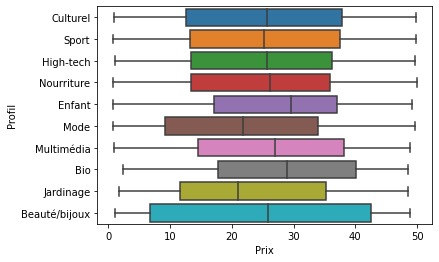

In [74]:
#Quels profils client achetent à des prix plus conséquents ?
sns.boxplot(x = 'Prix', y = 'Profil', data = features)

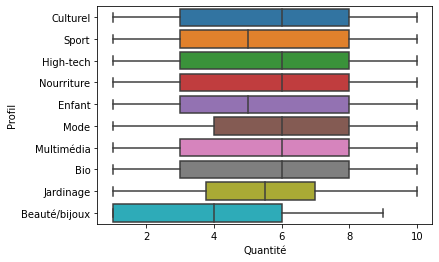

In [75]:
#Quels profils client achetent les plus grandes quantités ?
sns.boxplot(x = 'Quantité', y = 'Profil', data = features)

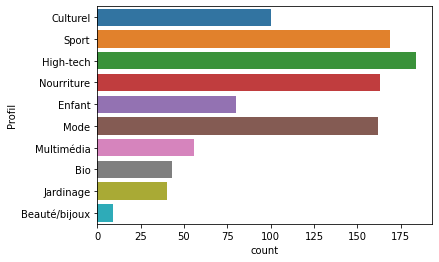

In [84]:
#Nombre de ventes par profil client :

sns.countplot(y = 'Profil', data = features)

In [81]:
#Y a-t-il des redondances entre les features?
features.corr()
#Non, aucune corrélation. Le coefficient le plus haut est entre le produit et le client, mais n'est pas très important.

,Vente,Client,Magasin,Prix,Quantité,Produit
Vente,1.000000,-0.031717,0.231712,-0.066798,0.038058,-0.007424
Client,-0.031717,1.000000,-0.073631,0.001850,-0.021804,0.776297
Magasin,0.231712,-0.073631,1.000000,0.015933,0.034962,-0.055858
Prix,-0.066798,0.001850,0.015933,1.000000,-0.060652,-0.048753
Quantité,0.038058,-0.021804,0.034962,-0.060652,1.000000,-0.023654
Produit,-0.007424,0.776297,-0.055858,-0.048753,-0.023654,1.000000
